# BEER Rating Prediction using rating categories  :
1. appearance
2. aroma
3. overall
4. palate
5. taste


In [ ]:
%matplotlib inline
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
sns.set()

# Import CSV
dir_path = os.path.dirname(os.path.abspath('__file__'))
file_path = os.path.join(dir_path, 'train.csv')
beer_data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
# Drop any column that is not very informative


# Split data frame into individual frames
reviews = dict()
for col in beer_data.columns:
    reviews.update({
            col:beer_data[col]
        })

In [2]:
beer_data.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [3]:
beer_data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
# Split the data into multiple DataFrames
# Drop any column that is not very informative. Example: "review_time", "brewery_id"
# a dictionary with individual DataFrames
beer_data.drop(['index','beer/beerId','review/timeStruct','review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender',"review/text"], axis=1, inplace=True)
beer_data.head()


,beer/ABV,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/profileName
0,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,RblWthACoz
1,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,BeerSox
2,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,mschofield
3,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,molegar76
4,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,Brewbro000


In [5]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/brewerId      37500 non-null  int64  
 2   beer/name          37500 non-null  object 
 3   beer/style         37500 non-null  object 
 4   review/appearance  37500 non-null  float64
 5   review/aroma       37500 non-null  float64
 6   review/overall     37500 non-null  float64
 7   review/palate      37500 non-null  float64
 8   review/taste       37500 non-null  float64
 9   user/profileName   37495 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.9+ MB


In [6]:
reviews = dict()
for col in beer_data.columns:
    reviews.update({
            col:beer_data[col]
        })

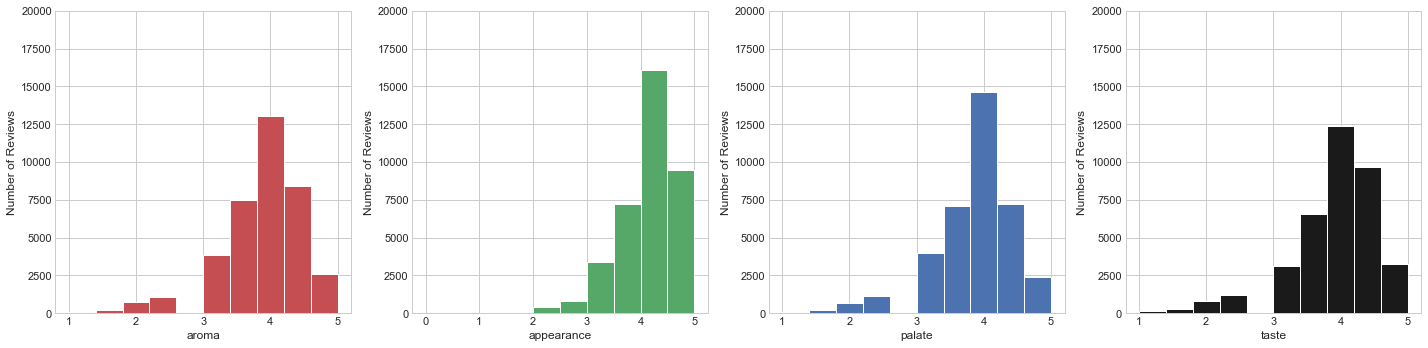

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
_reviews = ['review/overall', 'review/aroma', 'review/appearance', 'review/palate', 'review/taste']
beer_reviews = beer_data[_reviews].dropna(axis=1)
beer_reviews.head()

fig, ax = plt.subplots(ncols=4, figsize = (20,5))
colors = ['r', 'g', 'b', 'k', 'm']
for idx, head in enumerate(_reviews[1:]):
    plt.subplot(1, len(_reviews[1:]), idx+1)
    plt.ylim(0,20000)
    plt.xlabel(head.split('/')[1])
    plt.ylabel('Number of Reviews')
    plt.hist(beer_reviews[head], bins=10,color=colors[idx])
plt.tight_layout(h_pad=1.0)

In [8]:

# Define Margin of Error and Z-score for 95% confidence interval
mError = 0.1
zScore = 1.96


def prep_data_frame(_list):
    """
    _list: list of column headers. Example: ["beer_beerid","beer_name",..]
    """
    _dict = {header: reviews[header] for header in _list}
    return pd.DataFrame.from_dict(_dict)
    
def calculate_stats(key, data_frame):
    _df = data_frame.groupby(level=0)
    samples = _df.count().rename(columns={key: 'count'})
    means = _df.mean().rename(columns={key: 'mean'})
    std = _df.std().rename(columns={key:'std'})
    return pd.concat([samples, means, std], axis=1)
    

beer_identifiers = beer_data[['beer/brewerId','beer/name', 'beer/style', 'user/profileName']]
reviews_means = dict()
for key in ['review/overall', 'review/aroma', 'review/taste', 'review/appearance', 'review/palate']:
    
    # Prepare Data Frame for each review
    ids = prep_data_frame(beer_identifiers)
    review = prep_data_frame([key])
    data_frame = pd.concat([ids, review], axis=1).drop_duplicates(['beer/brewerId','user/profileName'])
    
    # Filter rows if number of reviews meet certain criteria
    stats = calculate_stats(key, data_frame.set_index(["beer/brewerId","beer/name"]))
    stats = stats[stats['std'] != 0] # Remove rows with zero std dev
    stats['required'] = stats['std'].map(lambda x:(x *zScore/mError)**2) # Add a new row with required num samples
    beer_ids = [idx for idx in stats.index if stats.loc[idx, 'count'] > stats.loc[idx, 'required']]
    mean_values = [stats.loc[idx, 'mean'] for idx in beer_ids]

    # Drop duplicate beerids and reviewer profilenames 
    data_frame = data_frame.drop_duplicates(['beer/brewerId']).drop('user/profileName', axis=1)

    # Keep the beers that have minimum number of reviews to predict ratings with 95% confidence interval
    review_data_frame = data_frame.set_index(['beer/brewerId'])

    review_data_frame = review_data_frame.drop([Id for Id in review_data_frame.index if Id not in beer_ids])

    
    #Add DataFrames for each attribute reviews
    reviews_means.update({
        key : review_data_frame.reset_index()
     })   
        

C:\Users\jaya\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


In [9]:
import json
import os

# Make a copy of the dictionary
_copy = dict()
for key, value in reviews_means.items():
    _copy[key] = value.to_json(orient='index')

# Get the directory path
out_file = os.path.join(dir_path, 'reviews_means.json' )
with open(out_file, 'w') as f:
    json.dump(_copy, f)

In [10]:
# Mean Overall Rating
dF = reviews_means['review/overall'].set_index(['beer/brewerId'])
dF = dF.sort_values(by='review/overall', ascending=False)
dF.head(10)

,beer/name,beer/style,review/overall
beer/brewerId,,,
3268,Pumpkin Ale,Pumpkin Ale,5.0
9020,Sue,American Porter,4.5
394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5
1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5
568,Piast,Euro Pale Lager,4.0
60,Pride Of Milford Special Ale,English Strong Ale,4.0
14,YouEnjoyMyStout,Russian Imperial Stout,4.0
14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0
1075,Caldera IPA,American IPA,4.0


In [11]:
#Aroma Over all rating 


dF = reviews_means['review/aroma'].set_index(['beer/brewerId'])
dF = dF.sort_values(by='review/aroma', ascending=False)
dF.head(10)

,beer/name,beer/style,review/aroma
beer/brewerId,,,
9020,Sue,American Porter,4.5
1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5
263,Aecht Schlenkerla Rauchbier MÃ¤rzen,Rauchbier,4.5
1075,Caldera IPA,American IPA,4.0
60,Pride Of Milford Special Ale,English Strong Ale,4.0
14,YouEnjoyMyStout,Russian Imperial Stout,4.0
14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0
394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.0
3268,Pumpkin Ale,Pumpkin Ale,4.0


In [12]:
#Appeareance overall rating
dF = reviews_means['review/appearance'].set_index(['beer/brewerId'])
dF = dF.sort_values(by='review/appearance', ascending=False)
dF.head(10)

,beer/name,beer/style,review/appearance
beer/brewerId,,,
807,Batemans XXXB,Extra Special / Strong Bitter (ESB),5.0
394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5
1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5
395,Bearded Pat's Barleywine,American Barleywine,4.0
2098,Festivale,Old Ale,4.0
1417,Black Sheep Ale (Special),English Pale Ale,4.0
14,YouEnjoyMyStout,Russian Imperial Stout,4.0
14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0
16386,Dank Imperial Red,American Amber / Red Ale,4.0


In [13]:
# palate
dF = reviews_means['review/palate'].set_index(['beer/brewerId'])
dF = dF.sort_values(by='review/palate', ascending=False)
dF.head(10)

,beer/name,beer/style,review/palate
beer/brewerId,,,
394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5
1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5
3268,Pumpkin Ale,Pumpkin Ale,4.5
1075,Caldera IPA,American IPA,4.0
9020,Sue,American Porter,4.0
10541,CucapÃ¡ Obscura,American Brown Ale,4.0
14,YouEnjoyMyStout,Russian Imperial Stout,4.0
14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0
16386,Dank Imperial Red,American Amber / Red Ale,4.0


In [14]:
# taste over all rating
dF = reviews_means['review/taste'].set_index(['beer/brewerId'])
dF = dF.sort_values(by='review/taste', ascending=False)
dF.head(10)

,beer/name,beer/style,review/taste
beer/brewerId,,,
3268,Pumpkin Ale,Pumpkin Ale,4.5
60,Pride Of Milford Special Ale,English Strong Ale,4.5
9020,Sue,American Porter,4.5
14,YouEnjoyMyStout,Russian Imperial Stout,4.5
263,Aecht Schlenkerla Rauchbier MÃ¤rzen,Rauchbier,4.5
394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5
1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5
1075,Caldera IPA,American IPA,4.0
3282,La Binchoise Blonde Tradition,Belgian Pale Ale,4.0


### Beer Rating Prediction 



### Predict overall rating for a beer
#### In this notebook, using the ratings for four attributes of the beers (aroma, appearance, palate and taste), I have train a regression model to predict the overall rating for a beer.

#### I have develop a regression model to identify the correlation between the attributes (collectively as well as individually) and the overall rating for a beer



In [15]:
Rating_data = pd.read_csv("train.csv")

In [16]:
%matplotlib inline
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [17]:

dir_path = os.path.dirname(os.path.abspath('__file__'))

# Get the file with reduced data set with sample means for each of the attributes.
file_path = os.path.join(dir_path, 'reviews_means.json')

data = dict()
with open(file_path, 'r') as f:
    data.update(
        json.load(f)
    )
data_copy = dict()
for key, value in data.items():
    data_copy[key] = pd.read_json(value, orient='index')

### Create a New DataFrame :Merge the reviews (Database style joining - OUTERJOIN)
#### The total number of samples are greater than any one DataFrame. For example, all the beers that have overall rating might not have the corresponding aroma rating.

#### Hence, concatenating and making a new DataFrame has many more samples than any one of the reviews and it has holes in the data.

In [18]:
# New DataFrame - reviews
reviews = data_copy['review/overall']

for review in ['review/aroma', 'review/appearance', 'review/palate', 'review/taste']:
    reviews = pd.merge(reviews, data_copy[review], how='outer')

### Data Cleaning
1. Remove NaNs
2. Other option is to impute the data to fill holes by looking at rating for similar beer styles.

In [19]:

reviews = reviews.dropna()
reviews.head()


,beer/brewerId,beer/name,beer/style,review/overall,review/aroma,review/appearance,review/palate,review/taste
0,395,Bearded Pat's Barleywine,American Barleywine,3.5,3.5,4.0,3.5,3.0
1,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5
2,1,Pilsner Urquell,Czech Pilsener,2.5,3.0,3.0,3.0,3.0
3,1417,Black Sheep Ale (Special),English Pale Ale,3.0,3.0,4.0,3.5,2.5
4,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5


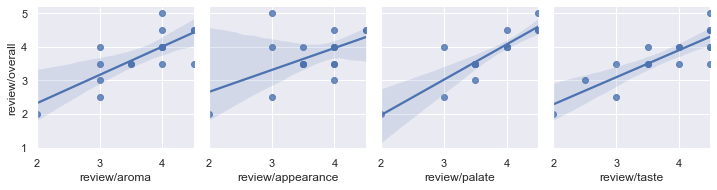

In [20]:
# visualize data
sns.pairplot(reviews, x_vars=['review/aroma', 'review/appearance', 'review/palate', 'review/taste'], 
             y_vars=['review/overall'], kind='reg')

## Regression Models
1. Isolate features (X) and targets(y).
2. Features are the attributes of the beers (aroma, appearance, palate and taste) and targets are overall reviews
3. Split dats into KFolds (Bootstrapping/Cross-validation)
4. Make an ML pipeline - Standardize data and fit a model
5. Apply different regressors to compare the fits

In [21]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor



### Predicting Overall Rating on the basis of 'review/aroma', 'review/appearance','review/palate', 'review/taste'

In [22]:
X = Rating_data[['review/aroma', 'review/appearance','review/palate', 'review/taste']]
y = Rating_data[['review/overall']]

## Instantiate multiple regression models
1. Linear Regression
2. Lasso ( with L1 penalty)
3. Ridge (with L2 penalty)
4. KNeighbor

In [23]:
kfold = KFold(n_splits=3, shuffle=True)
#linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
#lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, fit_intercept=True))
#ridge = make_pipeline(StandardScaler(), Ridge(fit_intercept=True))
#kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [24]:
# generating  k folds
data_sets = dict()
for split in range(10):
    _d = dict()
    for train_idx, test_idx in kfold.split(X):
        _d.update({
                'X_train' : X.iloc[train_idx],
                'X_test': X.iloc[test_idx],
                'y_train': y.iloc[train_idx],
                'y_test': y.iloc[test_idx]
            })
    data_sets.update({
            split : _d
        })


### Define Regression class: to wrap scikit-learn methods

In [25]:
from sklearn import metrics

class Regression:
    def __init__(self, regressor):
        self.regressor = regressor
        
    def fit(self, X, y):
        self.regressor.fit(X, y) 

    def predict(self, X, y):
        return self.regressor.predict(X)
    
    def score(self, X, y):
        return self.regressor.score(X, y)

    def mean_squared_error(self, X, y):
        return metrics.mean_squared_error(self.predict(X,y), y)
    
    def accuracy(self, X,y):
        return metrics.r2_score(self.predict(X,y), y)


### Define some utility functions
1. model_fit: Fits a regression model using one of the pipelines defined above
2. averaged_params: Fit a linear model for each data set generated by KFold splits
3. compute_averages: Compute averages of coefficeints, error and score over KFolds

In [26]:

def model_fit(data_set, regressor):
    params = dict()
    regressor.fit(data_set['X_train'], data_set['y_train'])
    neighbors = True if 'neighbors' in regressor.regressor.steps[1][0] else False
    params.update({
            'coeffs' : [0.0] if neighbors else regressor.regressor.steps[1][1].coef_,
            'intercept': [0.0] if neighbors else regressor.regressor.steps[1][1].intercept_,
            'mean_sq_error': regressor.mean_squared_error(data_set['X_train'], data_set['y_train']),
            'accuracy': regressor.accuracy(data_set['X_test'], data_set['y_test'])
        })
    #print (params)
    return params
    
def compute_averages(list_of_dicts):
    averaged_params = dict()
    for set_key in list_of_dicts[0].keys():
        _list = [val for obj in list_of_dicts for key, val in obj.items() if key == set_key]
        if isinstance(_list[0], dict):
            averaged_params[set_key] = compute_averages(_list)
        elif isinstance(_list[0], list) or isinstance(_list[0], np.ndarray):
            if isinstance(_list[0][0], dict):
                sub_list = [[_list[i][j] for i in range(len(_list))] for j in range(len(_list[0]))]
                averaged_params[set_key] = [compute_averages(x) for x in sub_list]
            else:
                averaged_params[set_key] = np.round(np.average(np.array(_list), axis=0), 3)
        elif isinstance(_list[0], float) or isinstance(_list[0], int):
            averaged_params[set_key] = np.round(np.average(np.array(_list)), 3)
        else:
            pass
    return averaged_params

def averaged_params(regressor):
    multiple_params = list()
    for set_key, value in data_sets.items():
        multiple_params.append({
                set_key: model_fit(value, regressor)
            })
    return compute_averages(multiple_params)

## Linear Regression

In [27]:
# Linear Regression Pipeline
linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
regressor = Regression(linear)

# Averaged Model Para
#meters over 5 splits (or 5-fold cross-validation) 
averaged_params(regressor)

{0: {'coeffs': array([[0.044, 0.029, 0.168, 0.384]]),
  'intercept': array([3.888]),
  'mean_sq_error': 0.171,
  'accuracy': 0.466}}

## Lasso (Regularization - L1 Penalty)

In [28]:
# Lasso Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True))
    regressor = Regression(lasso)
    print ("Lasso: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Lasso: alpha =  1.0
{0: {'coeffs': array([0., 0., 0., 0.]), 'intercept': array([3.888]), 'mean_sq_error': 0.496, 'accuracy': 0.0}}
**********************
Lasso: alpha =  0.1
{0: {'coeffs': array([0.002, 0.   , 0.129, 0.358]), 'intercept': array([3.888]), 'mean_sq_error': 0.184, 'accuracy': 0.131}}
**********************
Lasso: alpha =  0.01
{0: {'coeffs': array([0.041, 0.024, 0.165, 0.382]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.445}}
**********************
Lasso: alpha =  0.001
{0: {'coeffs': array([0.044, 0.029, 0.168, 0.384]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.464}}
**********************


## Ridge (Regularization - L2 Penalty)

In [29]:
# Ridge Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=True))
    regressor = Regression(ridge)
    print ("Ridge: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Ridge: alpha =  1.0
{0: {'coeffs': array([[0.044, 0.029, 0.168, 0.384]]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.466}}
**********************
Ridge: alpha =  0.1
{0: {'coeffs': array([[0.044, 0.029, 0.168, 0.384]]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.466}}
**********************
Ridge: alpha =  0.01
{0: {'coeffs': array([[0.044, 0.029, 0.168, 0.384]]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.466}}
**********************
Ridge: alpha =  0.001
{0: {'coeffs': array([[0.044, 0.029, 0.168, 0.384]]), 'intercept': array([3.888]), 'mean_sq_error': 0.171, 'accuracy': 0.466}}
**********************


### KNeighbors

In [34]:
# KNeighbors Regression Pipeline
for neighbors in range(1,5):
    kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=neighbors))
    regressor = Regression(kneighbors)
    print ("KNeighbors: neighbors = ", neighbors)
    print (averaged_params(regressor))
    print ('**********************')


KNeighbors: neighbors =  1
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.287, 'accuracy': 0.28}}
**********************
KNeighbors: neighbors =  2
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.219, 'accuracy': 0.389}}
**********************
KNeighbors: neighbors =  3
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.196, 'accuracy': 0.432}}
**********************
KNeighbors: neighbors =  4
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.184, 'accuracy': 0.426}}
**********************


# In these Models the best accuracy is around 46.6%  Linear Regression performs best with least Mean Sqoare error and good accuracy compared to others 